In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from scipy.spatial.distance import mahalanobis
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import IsolationForest


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from mlxtend.feature_selection import SequentialFeatureSelector
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile


from sklearn.model_selection import train_test_split

In [521]:
df = pd.read_csv('dataset_classification/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00


In [522]:
df.shape

(253680, 22)

In [523]:
df['Diabetes_012'].value_counts()   

Diabetes_012
0.00    213703
2.00     35346
1.00      4631
Name: count, dtype: int64

In [524]:
# I am going to rename thr Diabetes_012 column to Diabetes
df = df.rename(columns={'Diabetes_012': 'Diabetes'})

**Classes are imbalanced, I will try stratify or balance the classes.**

In [525]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Since all features float that's why they have one decimal value which is zero. Zero does not give me extra information.**<br>
**I do not think, that it wont effect on the model's result, so I keep it.**

**It seems that dataset is clean, no missing data and all features are in float format.**

In [526]:
df.shape

(253680, 22)

In [527]:
# Check for missing values
df.duplicated().sum()   

23899

In [528]:
# Drop duplicates
df = df.drop_duplicates()

In [529]:
# Check for missing values
df.duplicated().sum()   

0

In [530]:
df.shape

(229781, 22)

In [531]:
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,...,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00
mean,0.33,0.45,0.44,0.96,28.69,0.47,0.04,0.10,0.73,0.61,...,0.95,0.09,2.60,3.51,4.68,0.19,0.44,8.09,4.98,5.89
std,0.72,0.50,0.50,0.20,6.79,0.50,0.21,0.30,0.44,0.49,...,0.23,0.29,1.06,7.71,9.05,0.39,0.50,3.09,0.99,2.09
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,8.00,5.00,6.00
75%,0.00,1.00,1.00,1.00,32.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,2.00,4.00,0.00,1.00,10.00,6.00,8.00
max,2.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


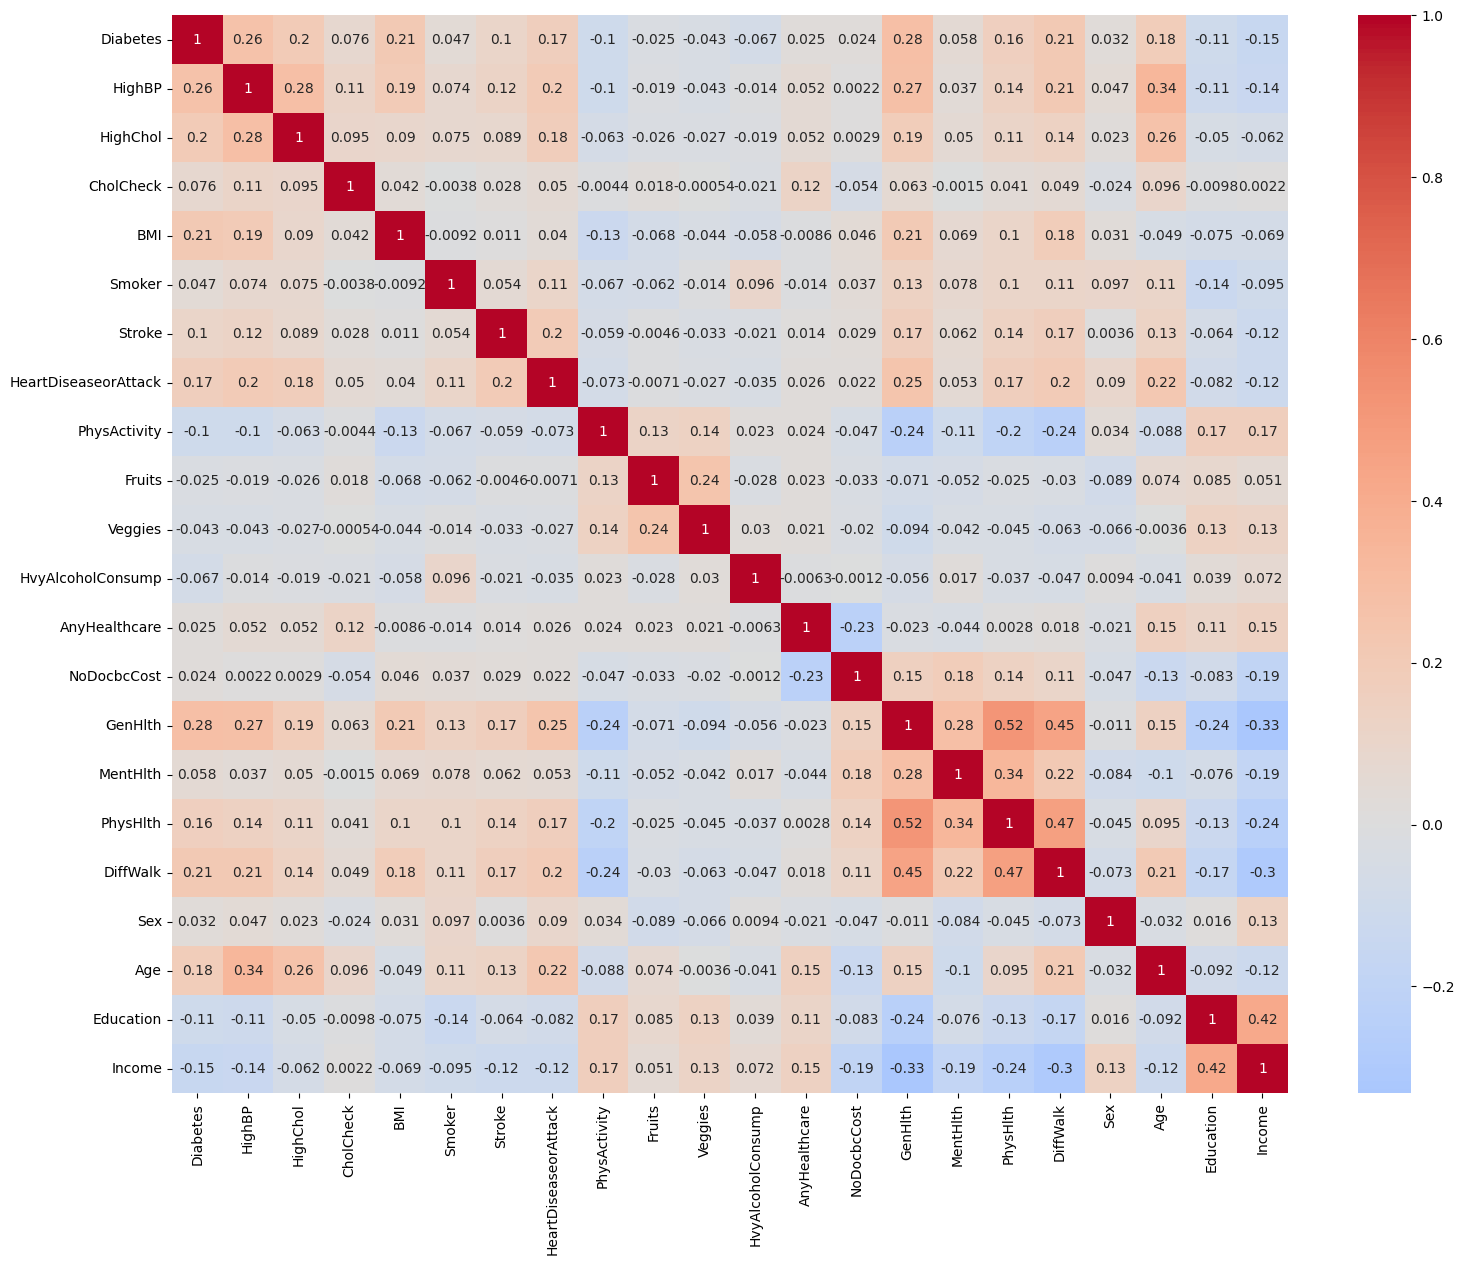

In [532]:
# Correlation matrix and heatmap
df.corr()
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

**When I look at this correlation matrix, I notice that some variables have a stronger relationship with diabetes. For example, HighBP and HighChol,**<br>
**this makes sense because people with high blood pressure or cholesterol have higher chances of diabetes.**<br>
<br>

**I also see that age has positive correlation with diabetes, which means that the risk of diabetes can increase as people get older**<br>
**It's also interesting to see that GenHealth and DiffWalk have positive correlations with diabetes, which means that if someone already has trouble walking or poor health,**<br>**they might have more chance to get diabetes.**
<br><br>

**On the other hand: PhysActivity, Education, and Income have negative correlations with diabetes. Which  means being active, having higher education, or more money might lower the risk.**<br>

In [533]:
#from sklearn.model_selection import train_test_split
#x= df.drop('Diabetes', axis=1)
#y = df['Diabetes']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [534]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(x_train, y_train)

In [535]:
#from sklearn.metrics import confusion_matrix, classification_report
#rf_pred = rf.predict(x_test)
#cm = confusion_matrix(y_test, rf_pred)
#print(cm)
#print(classification_report(y_test, rf_pred))

In [536]:
# Creating function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Feature"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_df.sort_values("VIF", ascending=False).round(2)

vif_results = calculate_vif(df)
vif_results
# I got this code from the lecture notes and just used it in a function

,Feature,VIF
20,Education,27.14
3,CholCheck,21.49
12,AnyHealthcare,18.96
4,BMI,17.57
21,Income,12.62
14,GenHlth,11.08
19,Age,9.78
10,Veggies,5.29
8,PhysActivity,4.14
9,Fruits,2.83


In [537]:
df.shape    

(229781, 22)

In [538]:
# Removing overlapping data with the Tomek Links method, to help model that classifies diabetes classes better
# Define target value 

"""
target = 'Diabetes'

# Showing the target value's classes distribution before removing overlap
print("Class distribution before overlap removal:")
print(df[target].value_counts())


# Split my dataset into X and y
X = df.drop(target, axis=1)
y = df[target]

# Creating the TomekLinks object
tl = TomekLinks()   

# create new resampled versions of X and y
X, y = tl.fit_resample(X, y)

# Re create a new DataFrame
df = pd.DataFrame(X, columns=X.columns)
df[target] = y

#Showing  the class distribution after Tomek Links
print("Class distribution AFTER overlap removal:")
print(df[target].value_counts())
# Target value's has three classes:
#  0 is for no diabetes only during pregnancy
#  1 is for pre-diabetes
#  2 is for diabetes

# I got the main idea code from lecture notes

"""

'\ntarget = \'Diabetes\'\n\n# Showing the target value\'s classes distribution before removing overlap\nprint("Class distribution before overlap removal:")\nprint(df[target].value_counts())\n\n\n# Split my dataset into X and y\nX = df.drop(target, axis=1)\ny = df[target]\n\n# Creating the TomekLinks object\ntl = TomekLinks()   \n\n# create new resampled versions of X and y\nX, y = tl.fit_resample(X, y)\n\n# Re create a new DataFrame\ndf = pd.DataFrame(X, columns=X.columns)\ndf[target] = y\n\n#Showing  the class distribution after Tomek Links\nprint("Class distribution AFTER overlap removal:")\nprint(df[target].value_counts())\n# Target value\'s has three classes:\n#  0 is for no diabetes only during pregnancy\n#  1 is for pre-diabetes\n#  2 is for diabetes\n\n# I got the main idea code from lecture notes\n\n'

**In my dataset, classes 0 and 2 have more borderline neighbors. Some No diabetes (only during pregnancy) values are close to diabetes.<br>I guess this makes sense because those two classes are the majority.**

In [539]:
"""
# 1) Separate the features from the target
features = df.drop(columns=[target])

# 2) Initialize the Isolation Forest with 5% 
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# 3) Fit the model on the features
iso_forest.fit(features)

# 4) Predict outliers (1 = inlier, -1 = outlier)
df['outlier_label'] = iso_forest.predict(features)

# 5) Filter to keep only inliers
df_no_outliers = df[df['outlier_label'] == 1].copy()

# 6) Drop the temporary outlier label
df_no_outliers.drop(columns=['outlier_label'], inplace=True)

# 7) Calculate and display the number of outliers removed
num_outliers_removed = len(df) - len(df_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")

# 8) Update the original dataframe
df = df_no_outliers

# 9) Show the class distribution after outlier removal
print("Class distribution AFTER Isolation Forest:")
print(df[target].value_counts())


# 
"""

'\n# 1) Separate the features from the target\nfeatures = df.drop(columns=[target])\n\n# 2) Initialize the Isolation Forest with 5% \niso_forest = IsolationForest(contamination=0.05, random_state=42)\n\n# 3) Fit the model on the features\niso_forest.fit(features)\n\n# 4) Predict outliers (1 = inlier, -1 = outlier)\ndf[\'outlier_label\'] = iso_forest.predict(features)\n\n# 5) Filter to keep only inliers\ndf_no_outliers = df[df[\'outlier_label\'] == 1].copy()\n\n# 6) Drop the temporary outlier label\ndf_no_outliers.drop(columns=[\'outlier_label\'], inplace=True)\n\n# 7) Calculate and display the number of outliers removed\nnum_outliers_removed = len(df) - len(df_no_outliers)\nprint(f"Number of outliers removed: {num_outliers_removed}")\n\n# 8) Update the original dataframe\ndf = df_no_outliers\n\n# 9) Show the class distribution after outlier removal\nprint("Class distribution AFTER Isolation Forest:")\nprint(df[target].value_counts())\n\n\n# \n'

**I will use  Mahalanobis for detecting the Multivariate outliers.**

In [540]:
"""data = df.values

# Here is needed to calculate average value for each column and covariance matrix
mu = np.mean(data, axis=0)
Sigma = np.cov(data, rowvar=False)
# Creating the list to store the Mahalanobis distances.

list = []
for i in range(data.shape[0]):
    x = data[i]
    list.append(mahalanobis(x, mu, Sigma))

# Calculating  Outlier Threshold
alpha = 0.05
threshold = np.quantile(list, 1 - alpha)

#Identify Outliers
outliers = np.where(list > threshold)[0]
print("Number of outliers:", len(outliers))
df = df.drop(df.index[outliers])
"""

'data = df.values\n\n# Here is needed to calculate average value for each column and covariance matrix\nmu = np.mean(data, axis=0)\nSigma = np.cov(data, rowvar=False)\n# Creating the list to store the Mahalanobis distances.\n\nlist = []\nfor i in range(data.shape[0]):\n    x = data[i]\n    list.append(mahalanobis(x, mu, Sigma))\n\n# Calculating  Outlier Threshold\nalpha = 0.05\nthreshold = np.quantile(list, 1 - alpha)\n\n#Identify Outliers\noutliers = np.where(list > threshold)[0]\nprint("Number of outliers:", len(outliers))\ndf = df.drop(df.index[outliers])\n'

In [541]:
# let's check the shape of the dataset after dealing with noise data
df.shape    

(229781, 22)

In [542]:
# In this dataset, some columns have low variance, after removing the outliers and overlapping data.
# I need to check for columns with no variance.
# I had same problem in the previous dataset, so I am gonna use the same code to check for columns with no variance.
"""
variance = df.var() 
no_variance_cols = variance[variance == 0].index
print("Columns with not variance:", no_variance_cols.tolist())

"""

'\nvariance = df.var() \nno_variance_cols = variance[variance == 0].index\nprint("Columns with not variance:", no_variance_cols.tolist())\n\n'

In [543]:
df['Diabetes'].value_counts()

Diabetes
0.00    190055
2.00     35097
1.00      4629
Name: count, dtype: int64

In [544]:
x = df.drop('Diabetes', axis=1)
Y = df['Diabetes']

In [545]:
X_cat = x.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,Y.astype(int))
pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1).round(2)  
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
15,PhysHlth,103705.81
3,BMI,16667.01
14,MentHlth,13499.06
18,Age,9400.41
0,HighBP,8633.56
16,DiffWalk,8310.28
13,GenHlth,8142.60
6,HeartDiseaseorAttack,6015.66
1,HighChol,5381.99
20,Income,3748.25


In [546]:
"""
matual_info = mutual_info_classif(x, Y, random_state=42)  

mutual_info = pd.DataFrame(matual_info)
df_columns = pd.DataFrame(x.columns)

mutual_info_scores = pd.concat([df_columns,mutual_info],axis=1).round(2)    
mutual_info_scores.columns = ['Features','Score']
mutual_info_scores.sort_values(by='Score',ascending=False)

"""


"\nmatual_info = mutual_info_classif(x, Y, random_state=42)  \n\nmutual_info = pd.DataFrame(matual_info)\ndf_columns = pd.DataFrame(x.columns)\n\nmutual_info_scores = pd.concat([df_columns,mutual_info],axis=1).round(2)    \nmutual_info_scores.columns = ['Features','Score']\nmutual_info_scores.sort_values(by='Score',ascending=False)\n\n"

In [547]:
"""sel_cols = SelectKBest(mutual_info_classif, k=10)
sel_cols.fit(x, Y)

selected_features = pd.DataFrame({
    'Feature': x.columns, 
    'Select': sel_cols.get_support(indices=True)}).sort_values(by='Select', ascending=False).round(2)

selected_features
"""

"sel_cols = SelectKBest(mutual_info_classif, k=10)\nsel_cols.fit(x, Y)\n\nselected_features = pd.DataFrame({\n    'Feature': x.columns, \n    'Select': sel_cols.get_support(indices=True)}).sort_values(by='Select', ascending=False).round(2)\n\nselected_features\n"

In [548]:
"""
sel_cols = SelectPercentile(mutual_info_classif, percentile=50)
sel_cols.fit(x, Y)
selected_features = pd.DataFrame({
    'Feature': x.columns, 
    'Selected': sel_cols.get_support()}).sort_values(by='Selected', ascending=False)
selected_features

"""

"\nsel_cols = SelectPercentile(mutual_info_classif, percentile=50)\nsel_cols.fit(x, Y)\nselected_features = pd.DataFrame({\n    'Feature': x.columns, \n    'Selected': sel_cols.get_support()}).sort_values(by='Selected', ascending=False)\nselected_features\n\n"

In [549]:
# Drop columns with False values
#df = df.drop(columns=selected_features[selected_features['Selected'] == False]['Feature']) 
#df.head()   

In [550]:
df=df.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
df.head()

,Diabetes,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,40.00,0.00,0.00,0.00,0.00,1.00,5.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,25.00,0.00,0.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,5.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,27.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,24.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,0.00,11.00,5.00,4.00


In [551]:
# save the cleaned dataset
df.to_csv('dataset_classification/diabetes_012_health_indicators_BRFSS2015_cleaned.csv', index=False)